## Analysis of Churn Data of a Telecom company

## Final Project Submission

Please fill out:
* Student name:  Mark Bundi
* Student pace:  part time
* Scheduled project review date/time:
* Instructor name:
* Blog post URL:

# Business Problem

The bussines problem in this senario is to provide Telecom company a prediction of churn of customers so it can effectively focus a customer retention marketing program.
Customer churn is the loss of clients or customers

## Introduction

The dataset contains data on the customers of a Telecom company. Each row represents a customer and the columns contain customer’s attributes

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression


# **Dataloading**

In [2]:
df = pd.read_csv('churn.csv')
df.head(3)

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False


# Data Understanding

In [3]:
#Summary statistics for data
df.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [4]:
df.shape

(3333, 21)

In [5]:
df.columns

Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn'],
      dtype='object')

In [6]:
#churn count
df['churn'].value_counts()

False    2850
True      483
Name: churn, dtype: int64

<BarContainer object of 2 artists>

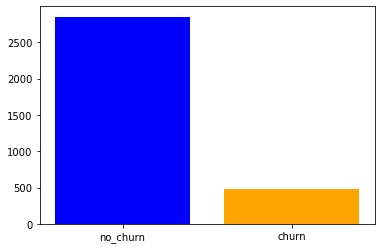

In [7]:
#Chart of churn
no_churn = 2850
churn = 483

x = ['no_churn','churn']
y = [2850,483]
c = ['blue','orange']

plt.bar(x , y, color=c)

<AxesSubplot:xlabel='state'>

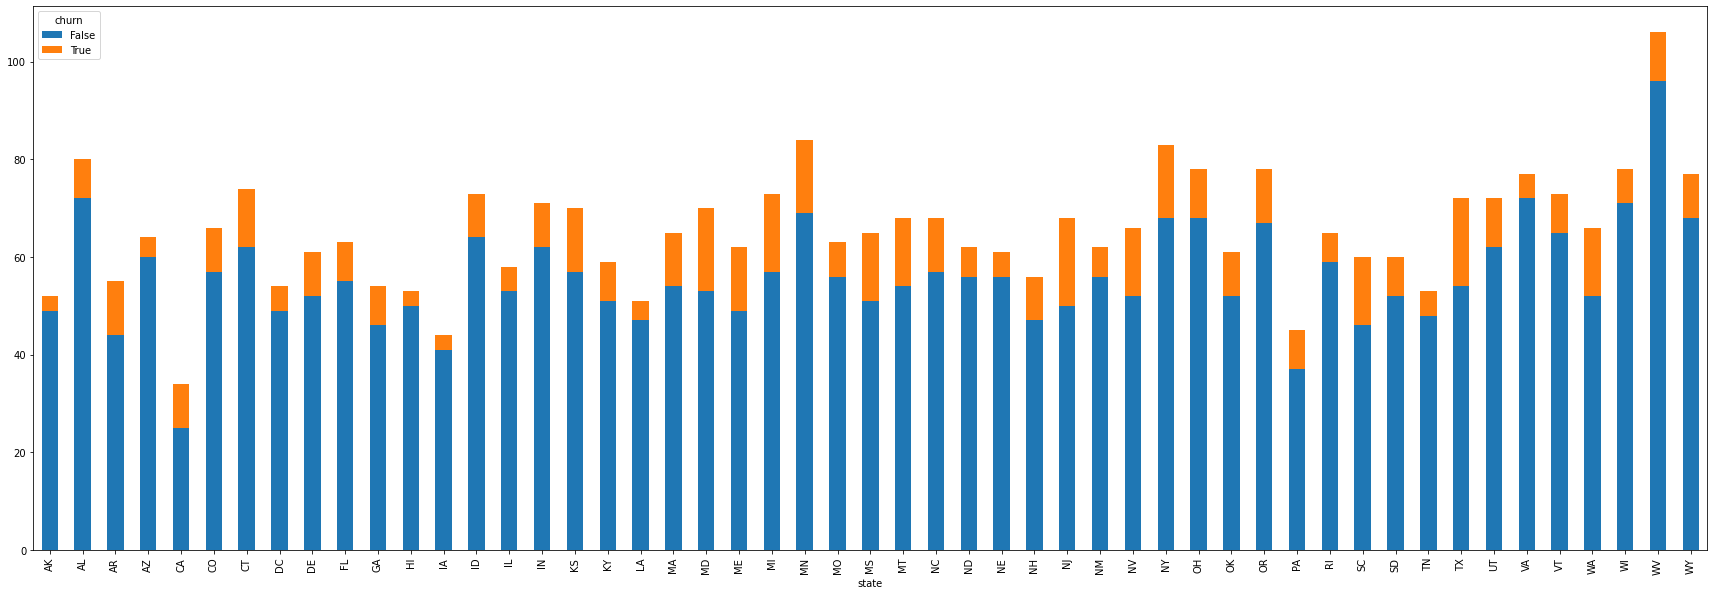

In [8]:
#Customer churn by state
df.groupby(["state", "churn"]).size().unstack().plot(kind='bar', stacked=True, figsize=(30,10))


<AxesSubplot:xlabel='international plan'>

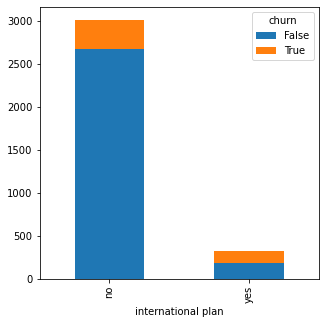

In [9]:
#Customer churn with international plan
df.groupby(['international plan','churn']).size().unstack().plot(kind='bar', stacked=True, figsize=(5,5))

<AxesSubplot:xlabel='voice mail plan'>

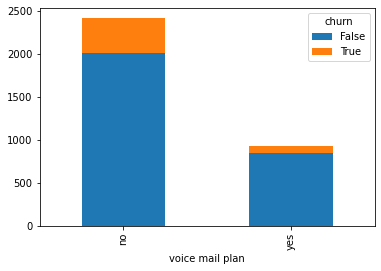

In [10]:
# Customers with voicemail
df.groupby(['voice mail plan','churn']).size().unstack().plot(kind ='bar', stacked='True')

In [11]:
#check for null values in dataset

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

# Data Processing


Handling Catagorical data

In [12]:
# Handling Catagorical data
df_pre = df.copy()

#Handling state
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(df_pre['state'])
df_pre['state'] = le.transform(df_pre['state'])


In [13]:
#Handling international plan	,voice mail plan
df_pre["international plan"] = df_pre["international plan"].apply(lambda x: 0 if x=="no" else 1)
df_pre["voice mail plan"] = df_pre["voice mail plan"].apply(lambda x: 0 if x=="no" else 1)

In [14]:
df_pre.sample(5)

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
744,26,78,415,377-7561,0,0,0,191.7,122,32.59,...,88,20.52,203.5,86,9.16,9.1,5,2.46,1,False
1077,34,108,415,344-7197,0,0,0,154.2,123,26.21,...,86,9.55,246.4,75,11.09,15.4,4,4.16,4,True
1827,37,95,415,364-8774,0,0,0,167.6,96,28.49,...,89,14.96,250.9,113,11.29,13.4,6,3.62,2,False
562,50,99,408,389-8606,0,1,28,200.7,88,34.12,...,116,22.46,172.7,102,7.77,9.1,5,2.46,1,False
990,40,38,415,375-5439,0,1,31,197.2,118,33.52,...,70,21.24,298.9,104,13.45,3.9,2,1.05,0,False


Checking for null values

In [15]:
df_pre.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   int32  
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   int64  
 5   voice mail plan         3333 non-null   int64  
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

Checking for duplicates

In [16]:
#check for duplicate
df_pre.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
3328    False
3329    False
3330    False
3331    False
3332    False
Length: 3333, dtype: bool

Dropping columns that are not needed

In [17]:
#drop phone number
df_pre = df_pre.drop(['phone number'],axis =1)
df_pre.columns

Index(['state', 'account length', 'area code', 'international plan',
       'voice mail plan', 'number vmail messages', 'total day minutes',
       'total day calls', 'total day charge', 'total eve minutes',
       'total eve calls', 'total eve charge', 'total night minutes',
       'total night calls', 'total night charge', 'total intl minutes',
       'total intl calls', 'total intl charge', 'customer service calls',
       'churn'],
      dtype='object')

# Modeling

Classification task

In [18]:
#defining x and y
y = df_pre['churn']
X = df_pre.drop(['churn'],axis=1)

In [19]:
#Standadize data
scaler = StandardScaler()
X = scaler.fit_transform(X)
X

array([[-0.6786493 ,  0.67648946, -0.52360328, ..., -0.60119509,
        -0.0856905 , -0.42793202],
       [ 0.6031696 ,  0.14906505, -0.52360328, ..., -0.60119509,
         1.2411686 , -0.42793202],
       [ 0.33331299,  0.9025285 , -0.52360328, ...,  0.21153386,
         0.69715637, -1.1882185 ],
       ...,
       [ 0.87302621, -1.83505538,  1.71881732, ...,  0.61789834,
         1.3871231 ,  0.33235445],
       [-1.35329082,  2.08295458,  1.71881732, ...,  2.24335625,
        -1.87695028,  0.33235445],
       [ 1.07541867, -0.67974475, -0.52360328, ..., -0.19483061,
         1.2411686 , -1.1882185 ]])

In [20]:
#make train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Baseline Model

# Logistical regression model

In [21]:
#Logistical regression model
clf = LogisticRegression(random_state=0)
model_log = clf.fit(X_train, y_train)
model_log

LogisticRegression(random_state=0)

In [22]:
#model evalutaion on train data
clf.score(X_train, y_train)

0.8595438175270108

We have an 85% accuracy in our model with train data

In [23]:
#model evalutaion on test data
clf.score(X_test, y_test)

0.8669064748201439

We have an 86% accuracy in our model with test data
This means the model has an 86% accuracy when pedicting customer churn.

## Descision Trees

In [24]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree

In [25]:
#Fit data
dtree = DecisionTreeClassifier(random_state=0)
dtree.fit(X_train,y_train)

DecisionTreeClassifier(random_state=0)

In [26]:
#use test data for accuracy measurement
dtree.score(X_test, y_test)

0.9184652278177458

In [27]:
#Accuracy test
y_pred_test = dtree.predict(X_test)
Accuracy = accuracy_score(y_test, y_pred_test)
Accuracy

0.9184652278177458

This means the model has a 91.8% chance of acccuracy when pedicting customer churn.

# KNN Classifier


In [28]:
from sklearn.neighbors import KNeighborsClassifier


In [29]:
#fit data
#default neighbours = 5
neigh = KNeighborsClassifier(n_neighbors=5)
neigh.fit(X_train,y_train)


KNeighborsClassifier()

In [30]:
#use train data for accuracy measurement
neigh.score(X_train,y_train)

0.9187675070028011

In [31]:
#use test data for accuracy measurement
neigh.score(X_test, y_test)

0.9064748201438849

In [32]:
#accuracy
y_pred_test = neigh.predict(X_test)
Accuracy = accuracy_score(y_test, y_pred_test)
Accuracy

0.9064748201438849

This means the model has a 90.6% chance of acccuracy when pedicting customer churn.

# Conclusion

Logistical regression : 86%

Decision Tree : 91.8%

KNN Classifier: 90.6%

Our goal was to identify clients which are likely to churn, so we can do special-purpose marketing strategies to avoid the churn event. For this we evaluated differently preprocessed datasets and different classifiers.
In the classification chapter we have trained several different classifiers, including a Logistic Regression, a K-Nearest Neighbors Classifier and Decision Tree.

Concluding, we suggest the Telecom company to use the Decision Tree  model to identify potential churn customers and according to the customers life-time value present them special offers.